In [1]:
import hopsy
import PolyRound
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
original_polytope = PolyRound.static_classes.parse_sbml_stoichiometry.StoichiometryParser.parse_sbml_cobrapy("../extern/hops/resources/e_coli_core/e_coli_core.xml")
polytope = PolyRound.api.PolyRoundApi.simplify_polytope(original_polytope)
polytope = PolyRound.api.PolyRoundApi.transform_polytope(polytope)
polytope.normalize()

In [3]:
replicates = 3np free
n_chains = 20

max_log_n_samples = 8
thin = 1
times = {}

In [4]:
p = hopsy.round(hopsy.Problem(polytope.A, polytope.b))

for i in range(replicates):

    s = hopsy.compute_chebyshev_center(p)
    markov_chains = [
        hopsy.MarkovChain(problem=p, starting_point=s)
        for i in range(n_chains)
    ]
    rngs = [hopsy.RandomNumberGenerator(i) for i in range(n_chains)]

In [5]:
for n in range(1, max_log_n_samples):
    times[n] = []
    for i in range(replicates):
        start = time.perf_counter()
        _, samples = hopsy.sample(
            markov_chains, rngs, n_samples=int(10**n/10), thinning=10, n_procs=n_chains
        )
        del samples
        end = time.perf_counter()
        times[n].append(end-start)
    times[n] = np.mean(times[n])
    print(n, ":", np.mean(times[n]))

1 : 0.11580483433333673
2 : 0.10977155233334202
3 : 0.12683100133332914
4 : 0.12220682200000017
5 : 0.3911829346666593
6 : 2.863150673666676
7 : 32.33105742033333


In [6]:
print(times)

{1: 0.11580483433333673, 2: 0.10977155233334202, 3: 0.12683100133332914, 4: 0.12220682200000017, 5: 0.3911829346666593, 6: 2.863150673666676, 7: 32.33105742033333}


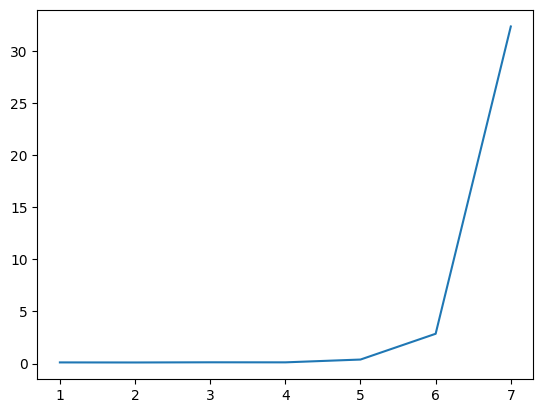

In [7]:
plt.plot(times.keys(), times.values())

In [8]:
times_ = {}
for n in range(1, max_log_n_samples-1):
    times_[n] = []
    for i in range(replicates):
        start = time.perf_counter()
        _, samples = hopsy.sample(
            markov_chains, rngs, n_samples=int(10**n), thinning=1, n_procs=n_chains
        )
        del samples
        end = time.perf_counter()
        times_[n].append(end-start)
    times_[n] = np.mean(times_[n])
    print(n, ":", np.mean(times_[n]))

1 : 0.11571398633335168
2 : 0.1203813416666814
3 : 0.18000933999998855
4 : 0.22300745566667501
5 : 0.9660565953333276
6 : 12.168448485333348


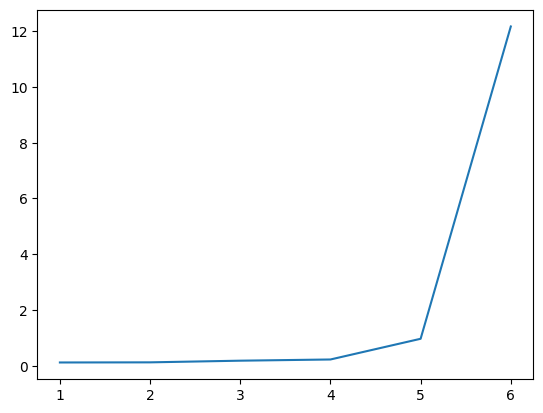

In [9]:

plt.plot(times_.keys(), times_.values())